# salary data analysis

In [4]:
%pip install numpy seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("../dataset/jobs_in_data.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [8]:
#statistical information
df.describe().T


,count,mean,std,min,25%,50%,75%,max
work_year,9355.0,2022.760449,0.519470,2020.0,2023.0,2023.0,2023.0,2023.0
salary,9355.0,149927.981293,63608.835387,14000.0,105200.0,143860.0,187000.0,450000.0
salary_in_usd,9355.0,150299.495564,63177.372024,15000.0,105700.0,143000.0,186723.0,450000.0


In [9]:
#check for duplication
df.nunique()

work_year                4
job_title              125
job_category            10
salary_currency         11
salary                1507
salary_in_usd         1786
employee_residence      83
experience_level         4
employment_type          4
work_setting             3
company_location        70
company_size             3
dtype: int64

In [10]:
#check missing value
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [11]:
#df no of rows and no of columns
df.shape

(9355, 12)

In [12]:
#no of job category
df["job_category"].unique()

array(['Data Engineering', 'Data Architecture and Modeling',
       'Data Science and Research', 'Machine Learning and AI',
       'Data Analysis', 'Leadership and Management',
       'BI and Visualization', 'Data Quality and Operations',
       'Data Management and Strategy', 'Cloud and Database'], dtype=object)

In [13]:
list(df["job_category"].unique())

['Data Engineering',
 'Data Architecture and Modeling',
 'Data Science and Research',
 'Machine Learning and AI',
 'Data Analysis',
 'Leadership and Management',
 'BI and Visualization',
 'Data Quality and Operations',
 'Data Management and Strategy',
 'Cloud and Database']

In [14]:
df.columns


Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [15]:
#average salary
sum(df["salary"])/ len(df["salary"])

149927.98129342598

In [16]:
df.salary.mean()

149927.98129342598

In [17]:
df["work_year"].value_counts()

work_year
2023    7453
2022    1634
2021     197
2020      71
Name: count, dtype: int64

In [18]:
employee_count_by_country = df["employee_residence"].value_counts()[:10]
employee_count_by_country

employee_residence
United States     8086
United Kingdom     442
Canada             224
Spain              117
Germany             66
France              54
Portugal            26
Netherlands         21
Australia           21
Italy               20
Name: count, dtype: int64

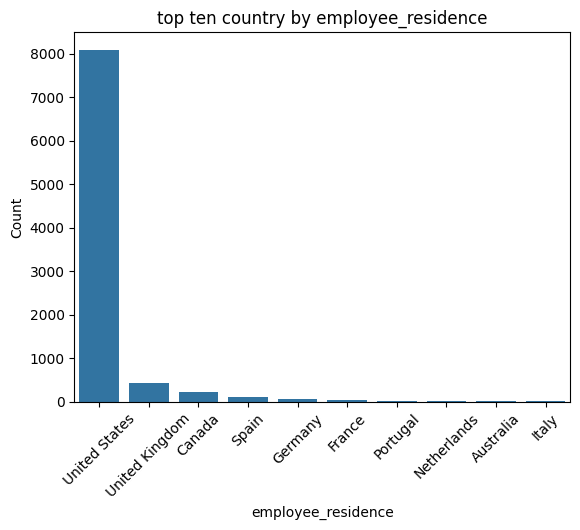

In [19]:
sns.countplot(x="employee_residence", data=df, order=employee_count_by_country.index)

# Add labels and title
plt.xlabel('employee_residence')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('top ten country by employee_residence')

plt.show()

In [20]:
#print min max salary
min_salary=df.salary_in_usd.min()
max_salary=df.salary_in_usd.max()
min_salary,max_salary

(15000, 450000)

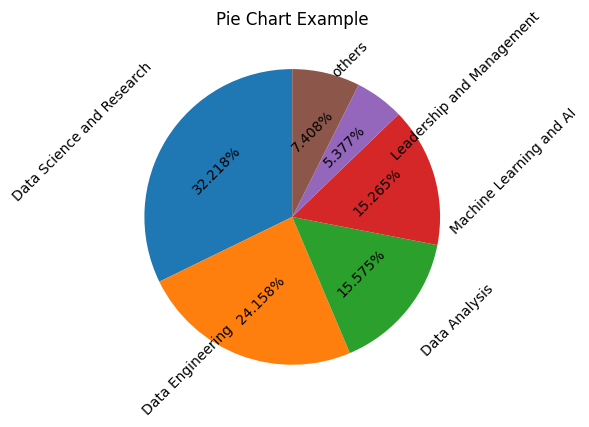

In [21]:
# draw pie chart for job job_category
category_counts = df['job_category'].value_counts()

threshold = 500
top_categories = category_counts[category_counts >= threshold]
others_count = category_counts[category_counts < threshold].sum()
top_categories["others"] = others_count

plt.pie(top_categories, labels=top_categories.index, autopct='%1.3f%%', startangle=90, textprops={'rotation': 45})

# Add a title
plt.title('Pie Chart Example')

# Show the plot
plt.show()

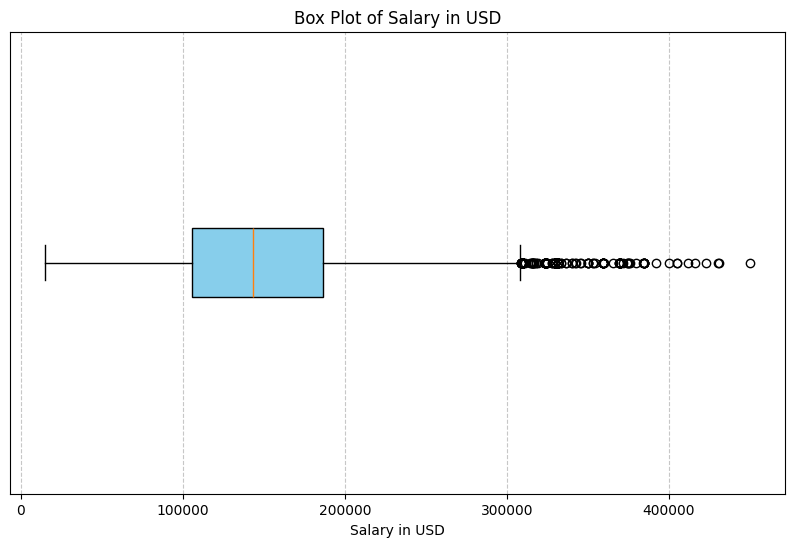

In [22]:
plt.figure(figsize=(10, 6))

plt.boxplot(df['salary_in_usd'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary in USD')
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [23]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
